In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from collections import Counter
from sklearn.metrics import accuracy_score

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


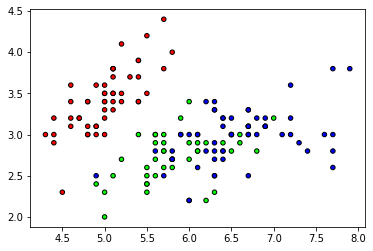

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [ ]:
def euclidean_dist(p, q):
  dist = np.sqrt(np.sum((q-p)**2))
  return dist

In [ ]:
class KNN_euclidean:
  def _init_(self, k):
    self.k = k
  
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    pred_labels = [self._predict(x) for x in X]
    return np.array(pred_labels)

  def _predict(self, x):
    #distance
    dists = [euclidean_dist(x, x_train) for x_train in self.X_train]
    #k-nearest sample
    k_id = np.argsort(dists)[:self.k]
    k_nearest = [self.y_train[i] for i in k_id]
    #majority vote
    most_common = Counter(k_nearest).most_common(1)
    return most_common[0][0]

In [ ]:
print('Accuracy Score:')
for k in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
  clsf_e = KNN_euclidean()
  clsf_e._init_(k)
  clsf_e.fit(X_train, y_train)
  y_pred = clsf_e.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  print(f'  {k}-Nearest: {accuracy}')

Accuracy Score:
  3-Nearest: 0.9210526315789473
  5-Nearest: 0.9210526315789473
  7-Nearest: 0.9473684210526315
  9-Nearest: 0.9473684210526315
  11-Nearest: 0.9210526315789473
  13-Nearest: 0.9473684210526315
  15-Nearest: 0.9473684210526315
  17-Nearest: 0.9473684210526315
  19-Nearest: 0.9210526315789473


In [ ]:
error = []
for k in range(1, 20):
  clsf_e = KNN_euclidean()
  clsf_e._init_(k)
  clsf_e.fit(X_train, y_train)
  y_pred = clsf_e.predict(X_test)
  
  error.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Mean Error')

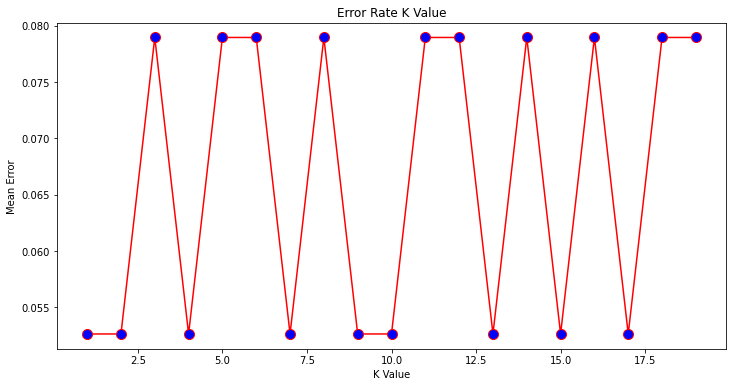

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 20), error, color='red', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')